## What to Expect in This Data Exploration

In this data exploration, we will:

- **Load and inspect the RAVDESS & EmotionAlly dataset**: Review the structure, columns, and basic statistics of the data.
- **Visualize emotion distribution**: Plot the frequency of each emotion label to understand class balance.
- **Explore audio samples**: Display waveforms for different emotions to observe their characteristics.
- **Prepare data for further analysis**: Organize and clean the dataset for feature extraction and modeling.

This process will help us gain insights into the dataset and guide the next steps in building a robust Speech Emotion Recognition (SER) model.

### A. Importing Necessary Libraries

In [1]:
import os
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from pathlib import Path
# Import configuration
from config import RAVDESS_DIR  

### B. RAVDESS Dataset Loader

In [2]:
from scripts.data_loader import load_ravdess_dataset
try:
    # Load dataset using path from config
    print(f"Loading RAVDESS dataset from: {RAVDESS_DIR}")
    df = load_ravdess_dataset(RAVDESS_DIR)
    
    # Verify data loaded correctly
    print(f"\nDataset loaded successfully:")
    print(f"Total samples: {len(df)}")
    print(f"Features available: {df.columns.tolist()}")
    
except Exception as e:
    print(f"Error loading dataset: {str(e)}")


Loading RAVDESS dataset from: c:\Users\LENOVO-Pc\OneDrive\Documents\THESIS-SER\new model\data\ravdess_actors

Dataset loaded successfully:
Total samples: 1440
Features available: ['path', 'emotion']


In [ ]:
from scripts.data_loader import load_ravdess_dataset
data_path = "data/ravdess_actors"
df = load_ravdess_dataset(data_path)

# Check columns
print(df.columns)

# Check first few rows
print(df.head())

# Check number of rows
print(f"Total files loaded: {len(df)}")


Index(['path', 'emotion'], dtype='object')
                                                path  emotion
0  data\ravdess_actors\Actor_01\03-01-01-01-01-01...  neutral
1  data\ravdess_actors\Actor_01\03-01-01-01-01-02...  neutral
2  data\ravdess_actors\Actor_01\03-01-01-01-02-01...  neutral
3  data\ravdess_actors\Actor_01\03-01-01-01-02-02...  neutral
4  data\ravdess_actors\Actor_01\03-01-02-01-01-01...     calm
Total files loaded: 1440


C:\Users\LENOVO-Pc\AppData\Local\Temp\ipykernel_4768\2168056009.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="emotion", data=df, palette='magma')


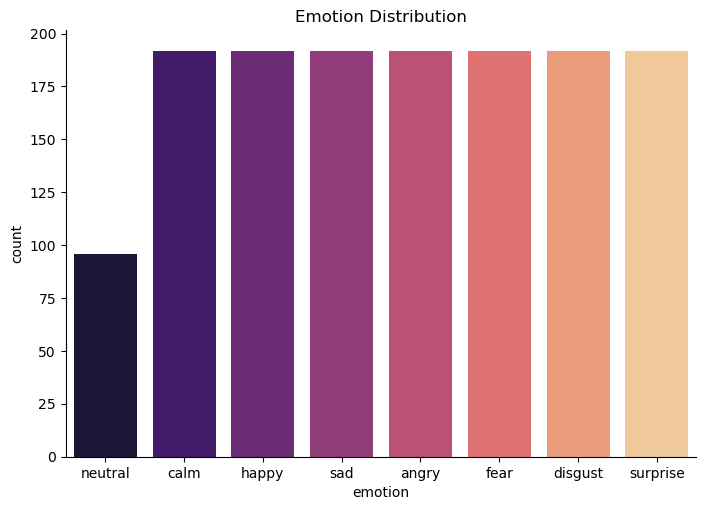

In [4]:
# Plot emotion distribution
plt.figure(figsize=(14, 10))
plt.subplot(2, 2, 2)
sns.countplot(x="emotion", data=df, palette='magma')
plt.title("Emotion Distribution")
plt.tight_layout(pad=2)
sns.despine()
plt.show()

In [5]:
print('\nRAVDESS Emotion Counts:')
print(df['emotion'].value_counts())


RAVDESS Emotion Counts:
emotion
calm        192
happy       192
sad         192
angry       192
fear        192
disgust     192
surprise    192
neutral      96
Name: count, dtype: int64


In [6]:
# Create a dataframe that contains all the emotion labels and paths from all the datasets
all_data = df.copy()
# Reset the index
all_data = all_data.reset_index(drop=True)
# Inspect the dataframe
all_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1440 entries, 0 to 1439
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   path     1440 non-null   object
 1   emotion  1440 non-null   object
dtypes: object(2)
memory usage: 22.6+ KB


c:\Users\LENOVO-Pc\anaconda3\Lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated and will be removed in a future release
  "class": algorithms.Blowfish,


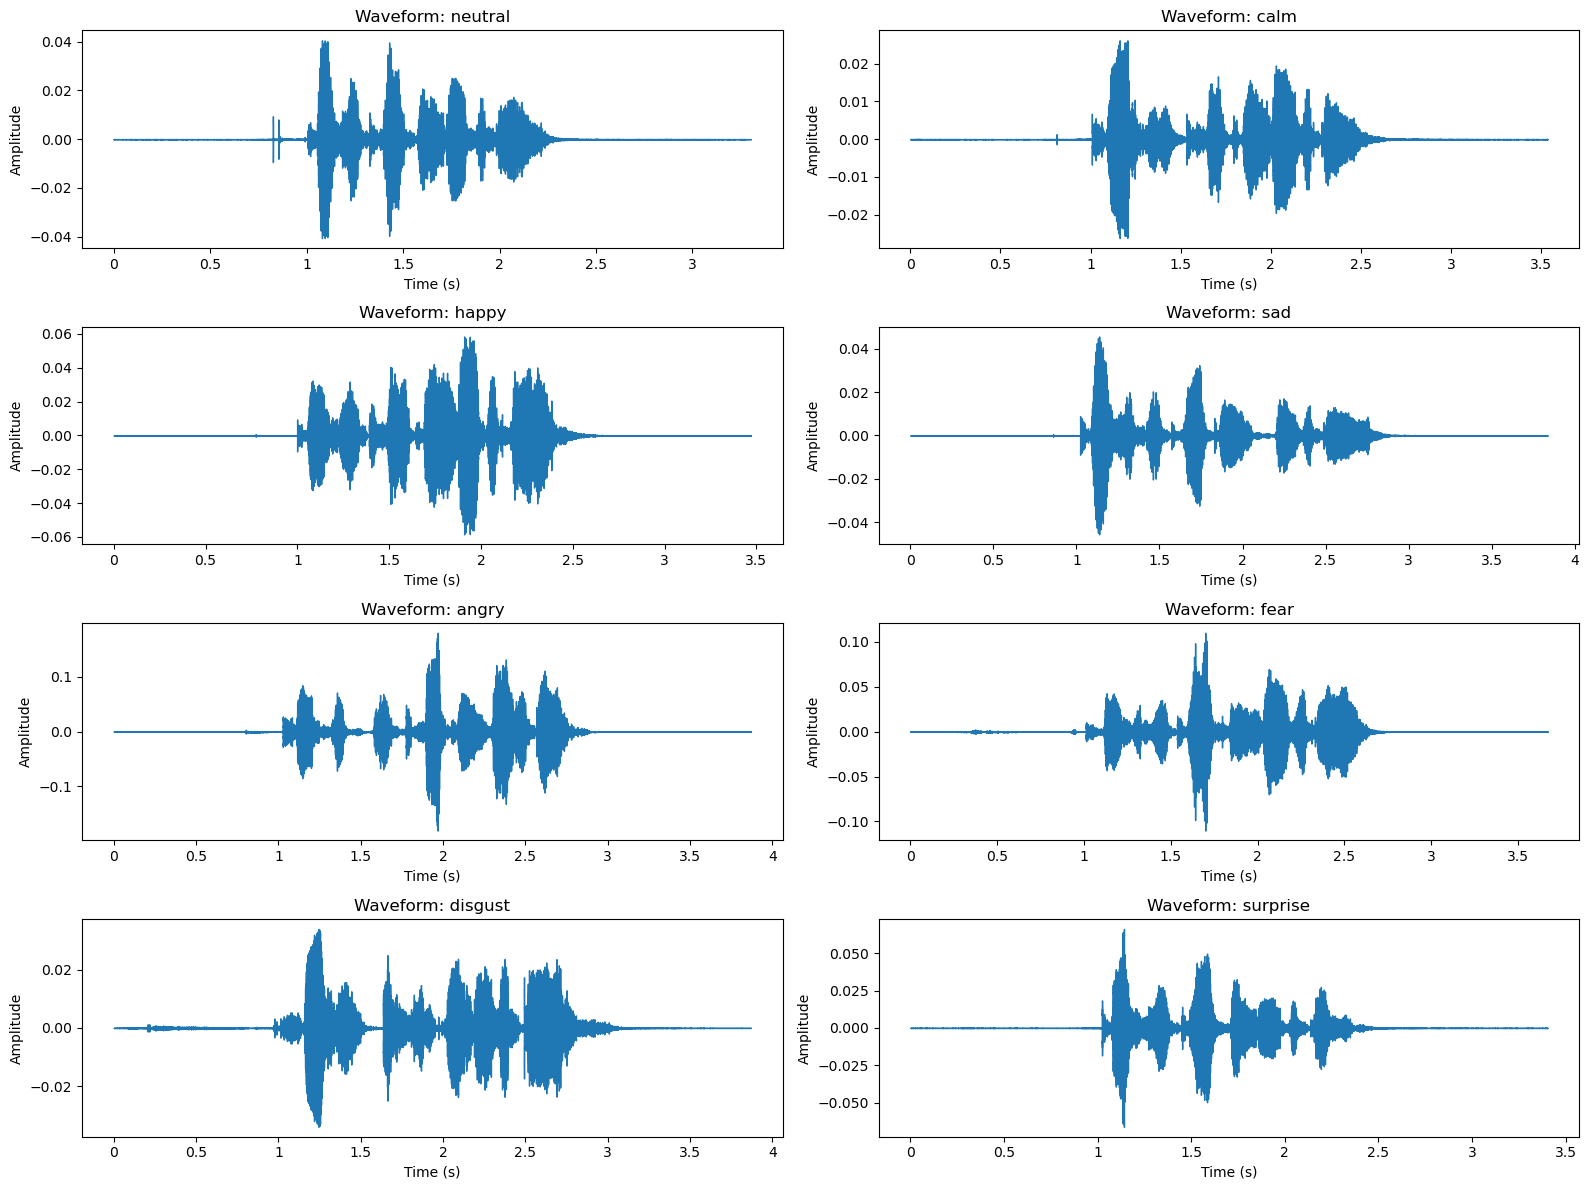

In [ ]:
import librosa
import librosa.display

emotions = all_data['emotion'].unique()
plt.figure(figsize=(16, 12))

for idx, emotion in enumerate(emotions):
    ravdess_path = all_data[all_data['emotion'] == emotion]['path'].iloc[0]
    y, sr = librosa.load(ravdess_path, sr=None)
    plt.subplot(4, 2, idx + 1)
    librosa.display.waveshow(y, sr=sr)
    plt.title(f'Waveform: {emotion}')
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')

plt.tight_layout()
plt.show()

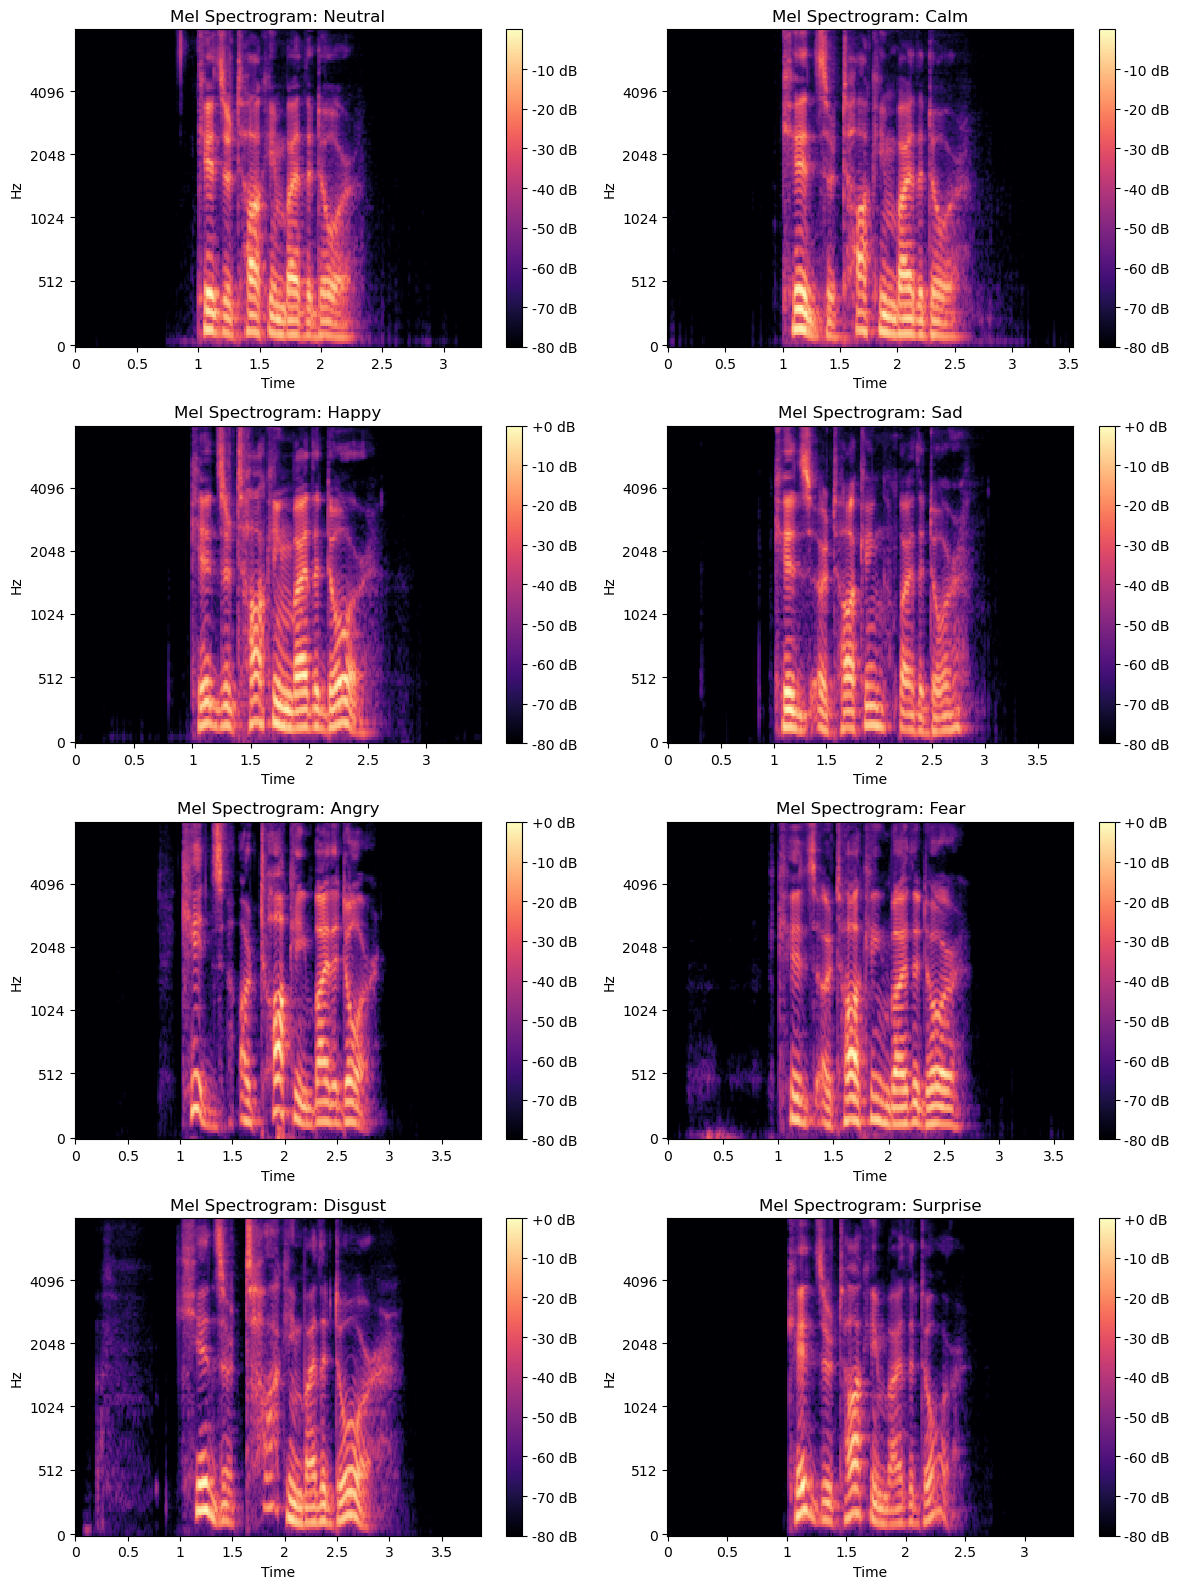

In [18]:
plt.figure(figsize=(12, 16))
emotions = all_data['emotion'].unique()

for idx, emotion in enumerate(emotions):
    plt.subplot(4, 2, idx + 1)
    audio_path = all_data[all_data['emotion'] == emotion]['path'].iloc[0]
    signal, sr = librosa.load(audio_path, sr=44100)
    mel_spec = librosa.feature.melspectrogram(y=signal, sr=sr, n_mels=128, fmax=8000)
    mel_db = librosa.power_to_db(mel_spec, ref=np.max)
    librosa.display.specshow(mel_db, sr=sr, x_axis='time', y_axis='mel', fmax=8000)
    plt.title(f'Mel Spectrogram: {emotion.capitalize()}')
    plt.colorbar(format='%+2.0f dB')

plt.tight_layout()
plt.show()

### C. EmotionAlly Podcast Dataset Loader